<a href="https://colab.research.google.com/github/Denis-Yen/DataScience/blob/main/6_Maquinas_Soporte_Vectorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maquinas de Soporte Vectorial (SVM) 
Algoritmo de Machine Learning supervisado tanto para clasificación como regresión.
Inicios de 1990 por la compañia telefónica AT$T

## Linear Support Vector Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [ ]:
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]

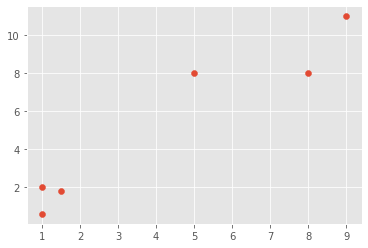

In [ ]:
plt.scatter(X,Y)
plt.show()

#### Creando el modelo clasificador lineal (supervizado)

In [ ]:
data = np.array(list(zip(X,Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [ ]:
target = [0,1,0,1,0,1]

In [ ]:
# Modelo
classifier = svm.SVC(kernel="linear", # linear = buscar un hiperplano (recta)
                     C=1.0
                     )
classifier.fit(data, target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predecir si el punto cae en la categoria 0 
p = np.array([0.57,0.67]).reshape(1,2)
print(p)
classifier.predict(p) # cae en la categoria 0

[[0.57 0.67]]


array([0])

In [ ]:
# Predecir si el punto cae en la categoria 1 
p = np.array([10.37,12.67]).reshape(1,2)
print(p)
classifier.predict(p) # cae en la categoria 1

[[10.37 12.67]]


array([1])

In [ ]:
# valores de los pesos para la primera y segunda categoría
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [ ]:
# Pendiente de la recta
a = -w[0]/w[1]
a

-0.5645161290322581

In [ ]:
# Ordenanda en elorigen, intercept
b = -classifier.intercept_[0]/w[1]
b

6.734677437813051

* modelo = $w_0.x + w_i.y + e = 0$
* La ecuación del  hiperplano en 2D que obtenimos es:
$y = a.x + b$


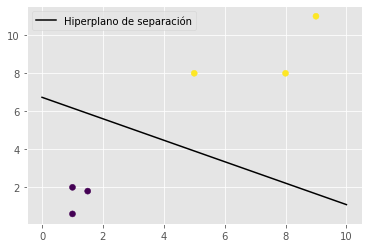

In [ ]:
# Representacion de la recta
xx = np.linspace(0,10)
yy = a * xx + b

plt.plot(xx, yy, 'k-', label = "Hiperplano de separación")
plt.scatter(X, Y, c=target)
plt.legend()
plt.show()

# Support Vector Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set() # representación gráfica
from sklearn.datasets.samples_generator  import make_blobs # generador de muestras

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X, Y = make_blobs(n_samples=50,centers=2, random_state=0, cluster_std=0.6)

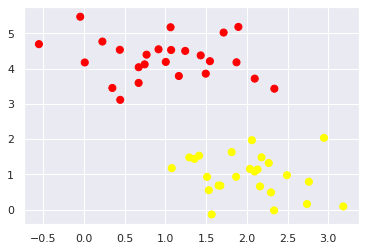

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

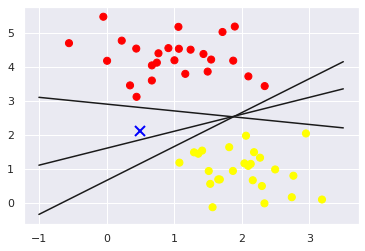

In [ ]:
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1], 'x', color = "blue", markeredgewidth = 2, markersize = 10 )

for a, b in [(1,0.65),(0.5,1.6), (-0.2,2.9)]:
    yy = a * xx + b
    plt.plot(xx, yy, 'k')


Del gráfico , no se pueder esocoger d emanera clara que recta usar para juntar el punto x con cualquiera de los dos clusters.

Para solucionar esto, por que no sleccionar un corredor? con una anchura y puntar el pasillo más ancho, es decir maximizar el margen

#### Maximización del Margen

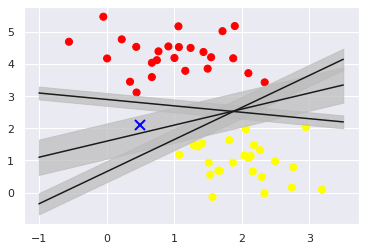

In [ ]:
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt.plot([0.5],[2.1], 'x', color = "blue", markeredgewidth = 2, markersize = 10 )

for a, b, d in [(1,0.65, 0.33),(0.5,1.6,0.55), (-0.2,2.9,0.2)]:
    yy = a * xx + b
    plt.plot(xx, yy, 'k')
    plt.fill_between(xx,yy-d, yy+d, edgecolor ='none', color='#BBBBBB', alpha = 0.7) # la letra de es (0.33,0.55,0.2), calculado a priori, esto es la proyección ortogonal

El estimador que se usa es aquel vector que maximiza los margenes SVM

# Creación del modelo SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plt_svc(model, ax= None, plot_support = True):
    """Plot de la función de decisón ára clasificación 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Generamos la parrilla d eputnos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1],30)
    yy = np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy, xx)

    # Evaluar el modelo
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    #Representamos las fronteras y los margenes del SVC
    ax.contour(X,Y,P,colors = 'k', levels = [-1,0,1], alpha = 0.5, linestyles=["--","-","--"])

    print(model.support_vectors_)

    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1], s=300, linewidth=1, facecolors = "black")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


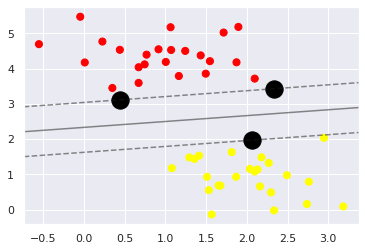

In [ ]:
plt.scatter(X[:,0], X[:,1],c=Y, s=50, cmap="autumn")
plt_svc(model)

Del gráfico hemos encontrado la recta que maximiza las distancias. Ademas s eobserva que dos puntos que conectan con la recta, ah estos se les conoce como **soportes**.

In [ ]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


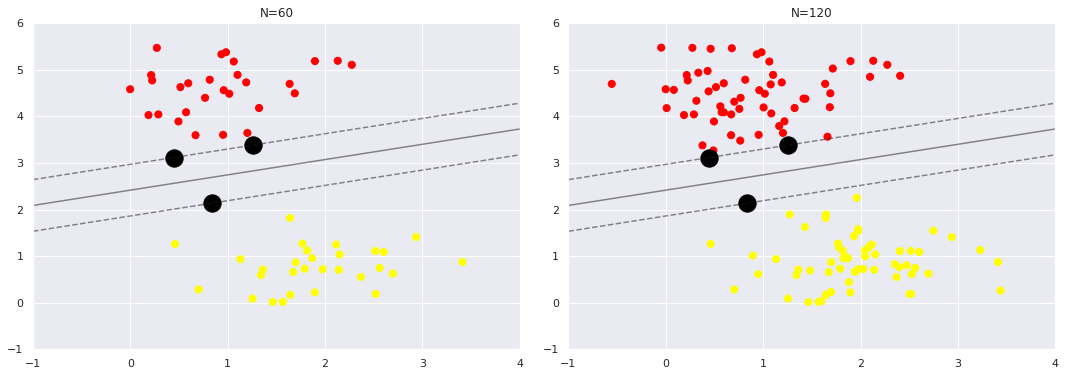

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

El modelo es insensible a los puntos que no forman parte del soporte.

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm>

# Identificar fronteras no lineales

In [ ]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [ ]:
X, Y = make_circles(100, factor = .1, noise = .1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [ ]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

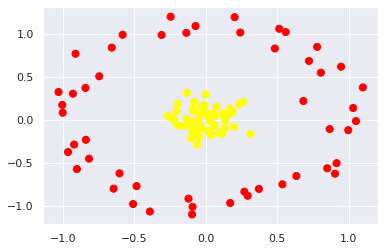

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")


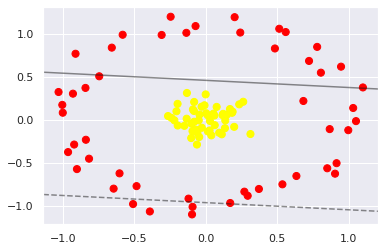

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

La discriminación lineal para esta distribución no es la adecuada, se deb aumentar la dimensión(3D).

In [ ]:
r = np.exp(-(X**2).sum(1))
r # alturas de los puntos

array([0.36376578, 0.29563077, 0.98801311, 0.94627343, 0.97137232,
       0.39327041, 0.59776785, 0.22306444, 0.96671475, 0.91741376,
       0.42773307, 0.42568865, 0.46612858, 0.93031006, 0.99239986,
       0.95093746, 0.31041922, 0.98220109, 0.38140409, 0.97449641,
       0.9940046 , 0.98242906, 0.99695388, 0.98178008, 0.92860503,
       0.27834358, 0.39710352, 0.97319042, 0.99749065, 0.26707891,
       0.46775175, 0.9157956 , 0.34233921, 0.99198973, 0.95891981,
       0.30237814, 0.98182115, 0.31971804, 0.99422919, 0.97497082,
       0.31882725, 0.95689042, 0.43634488, 0.37091375, 0.94283596,
       0.25887347, 0.95663588, 0.98167511, 0.43695928, 0.26502435,
       0.23031207, 0.35383689, 0.33622825, 0.45676183, 0.34743859,
       0.33860046, 0.98427063, 0.97287837, 0.97405711, 0.89332121,
       0.47113581, 0.27548752, 0.24976452, 0.98346971, 0.97734591,
       0.99396468, 0.29564745, 0.95237889, 0.35203022, 0.38303989,
       0.29834556, 0.96021633, 0.44261973, 0.96048133, 0.42780

In [ ]:
from mpl_toolkits import mplot3d

In [ ]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [ ]:
from ipywidgets import interact, fixed

In [ ]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D>

## Radial basis function
Para clasificar formas circulares

In [ ]:
rbf = SVC(kernel="rbf", C=1E6) # kernel radial
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

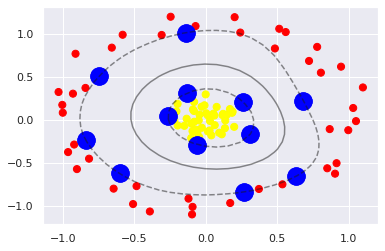

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

## Ajustar los parámetros de SVM
Esto se logra cambiando los valores de la penalización `C`.


In [ ]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

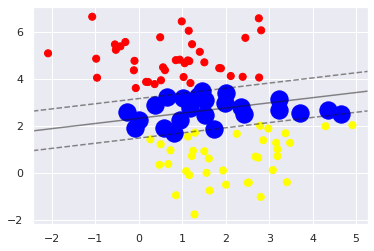

In [ ]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=1) # C parametro de la penalización
model.fit(X,Y)
plt_svc(model)

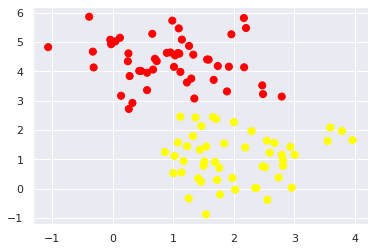

In [ ]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

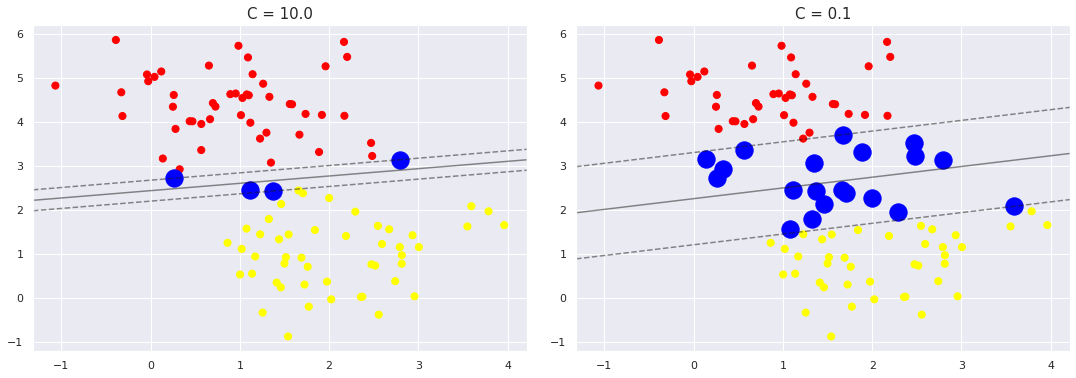

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)

# Reconocimiento Facial


In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [ ]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [ ]:
print(faces.images.shape) # 1348 fotos, 62 pixeles de altura y 47 de ancho (2914 pixeles)

(1348, 62, 47)


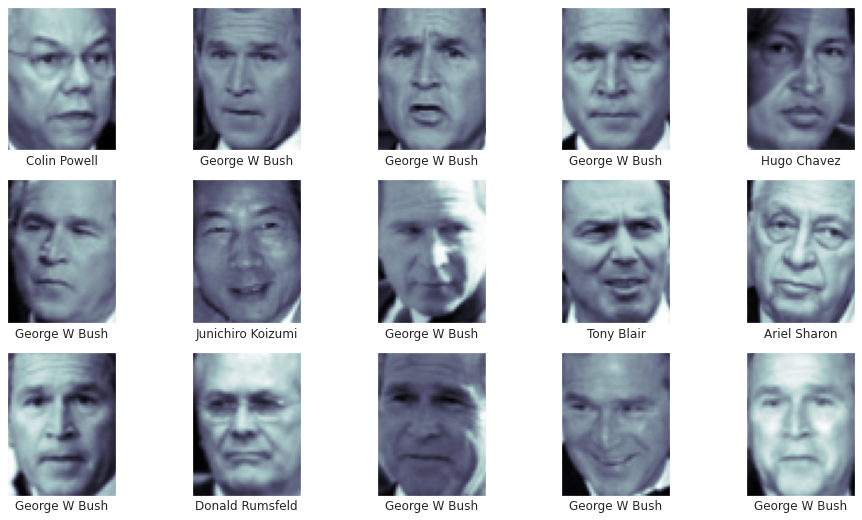

In [ ]:
fig, ax = plt.subplots(3,5, figsize = (16,9))
for i , ax_i in enumerate(ax.flat):
  ax_i.imshow(faces.images[i], cmap="bone")
  ax_i.set(xticks = [], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline # Cargar istruccones unas tra otras

In [ ]:
# Las imagenes extraidas tiene 1514 domensiones o variables
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", 
          class_weight="balanced") # para ponderar los razgos más resaltantes de las imágenes
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividimos los datos
Xtrain, xtest, Ytrain, ytest = train_test_split(faces.data, faces.target, random_state =42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "svc__C": [0.1,1,5,10,50],
    "svc__gamma": [0.0001,0.0005, 0.001, 0.005, 0.01]
}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)

CPU times: user 1min 54s, sys: 1min 1s, total: 2min 55s
Wall time: 1min 47s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ran

In [ ]:
print(grid.best_params_) # Probar hasta encontrar la mejor combinación de C y gamma

{'svc__C': 10, 'svc__gamma': 0.001}


In [ ]:
classifier = grid.best_estimator_
yfit = classifier.predict(xtest)

Text(0.5, 0.98, 'Predicciones de las imágenes (icorrectas en rojo')

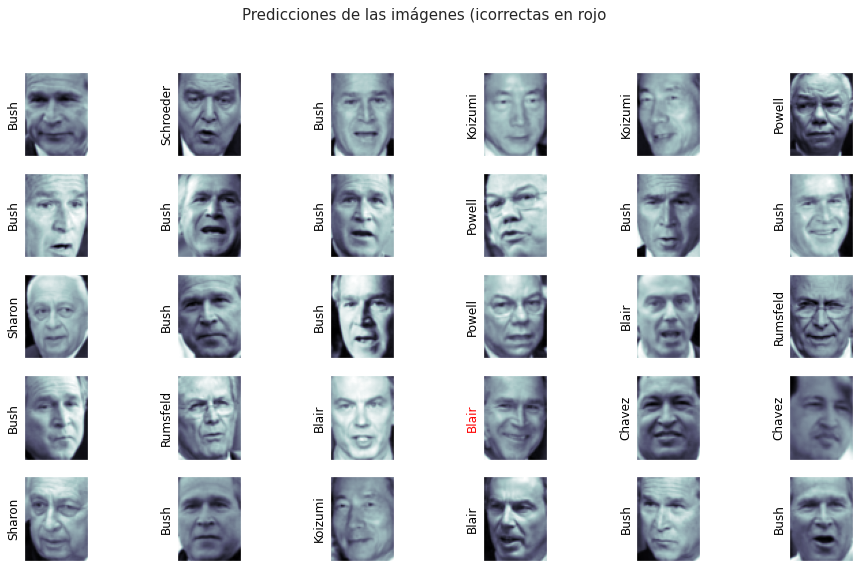

In [ ]:
fig, ax = plt.subplots(5,6, figsize = (16,9))
for i, ax_i in enumerate(ax.flat):
  ax_i.imshow(xtest[i].reshape(62,47), cmap="bone")
  ax_i.set(xticks = [], yticks = [])
  ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color = "black" if yfit[i]==ytest[i] else "red")

fig.suptitle("Predicciones de las imágenes (icorrectas en rojo", size = 15)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names = faces.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



De los anterior se muestra la precisión del modelo y *recall* es la sensibilidad. el sporte en el número de individuos

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
mat = confusion_matrix(ytest, yfit)

In [ ]:
import seaborn as sns; sns.set()

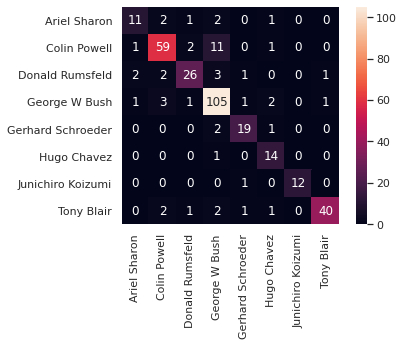

In [ ]:
sns.heatmap(mat.T, # En tuplas
            square=True, # los cuadrados
            annot=True, # numeros dentros
            fmt='d', # fromato de los numeros
            cbar=True, # barra de calor lateral
            xticklabels=faces.target_names, # eje x
            yticklabels=faces.target_names) # eje Y

Las mejores clasificaciones apaarcen en la diagonal.
Colin Powell ah sido masl clasificado (11 veces), fue Geroge Bush

# Clasificación y Regresión -SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
X = iris.data[:,:2] # solo usamos la longitud de los petalos
Y = iris.target

In [ ]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx ,yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min, y_max, h))

x_plot = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
# Modelo
C = 1.0
svc = svm.SVC(kernel="linear", C = C,
              decision_function_shape="ovr" # ajustar datos
              ).fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

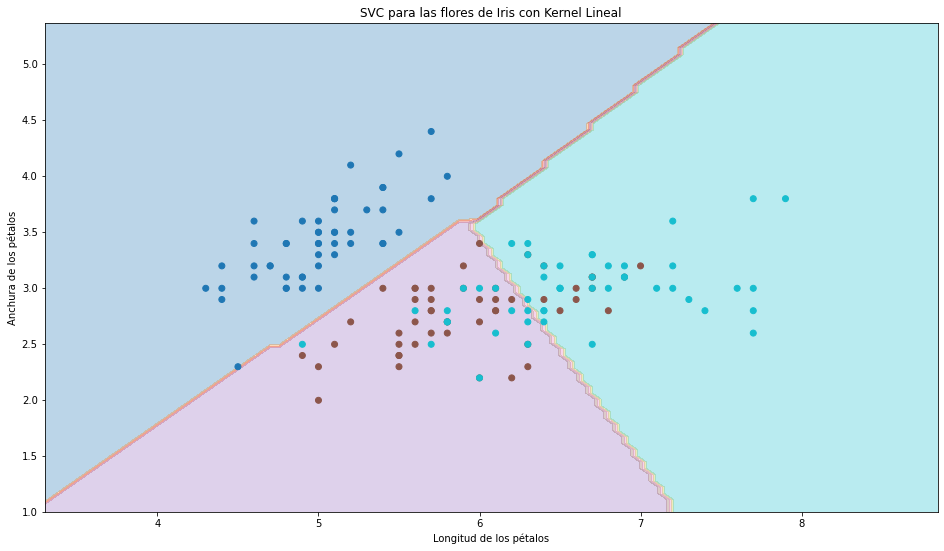

In [ ]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Lineal")

### Usando kernel radial

In [ ]:
C = 1.0
svc = svm.SVC(kernel="rbf", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

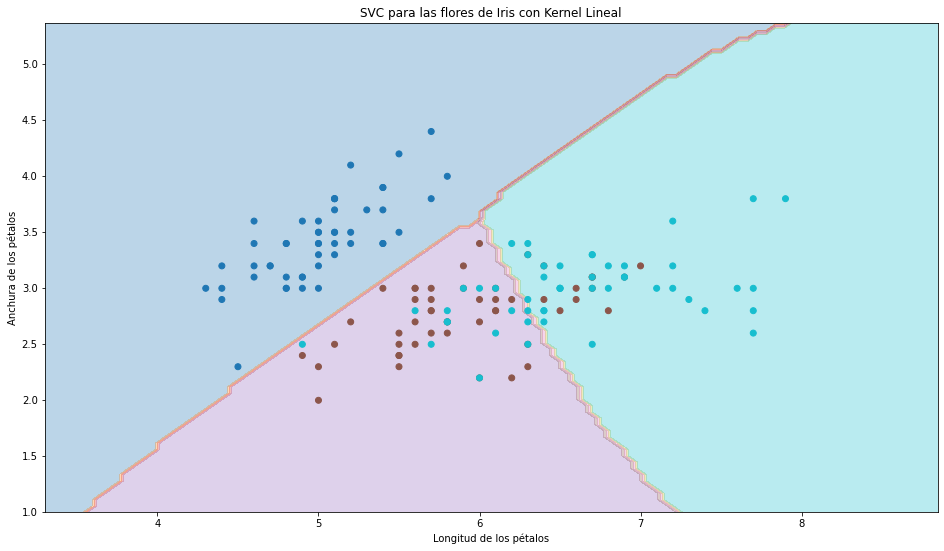

In [ ]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Radial")

### Usando kernel sigmoide 

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

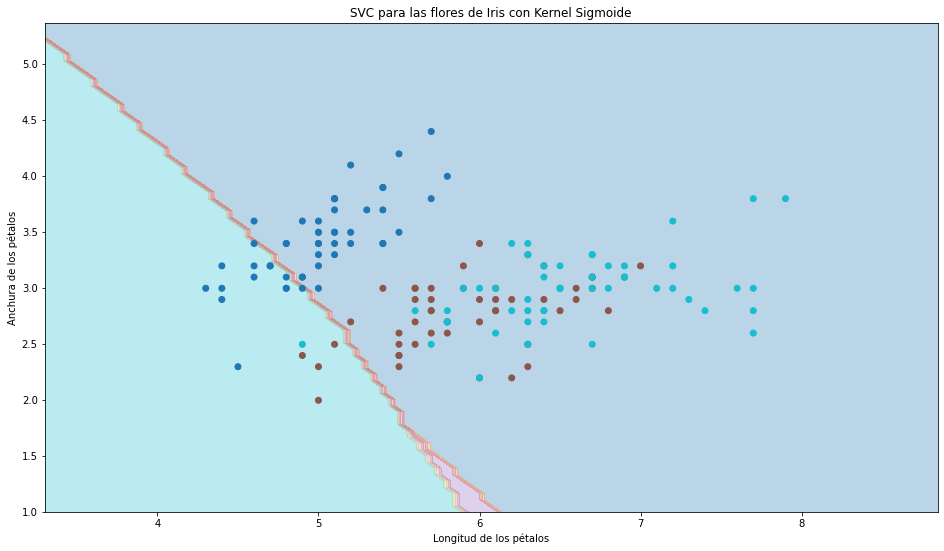

In [ ]:
C = 1.0
svc = svm.SVC(kernel="sigmoid", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Sigmoide")

### Usando kernel polynomial

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Polinomial')

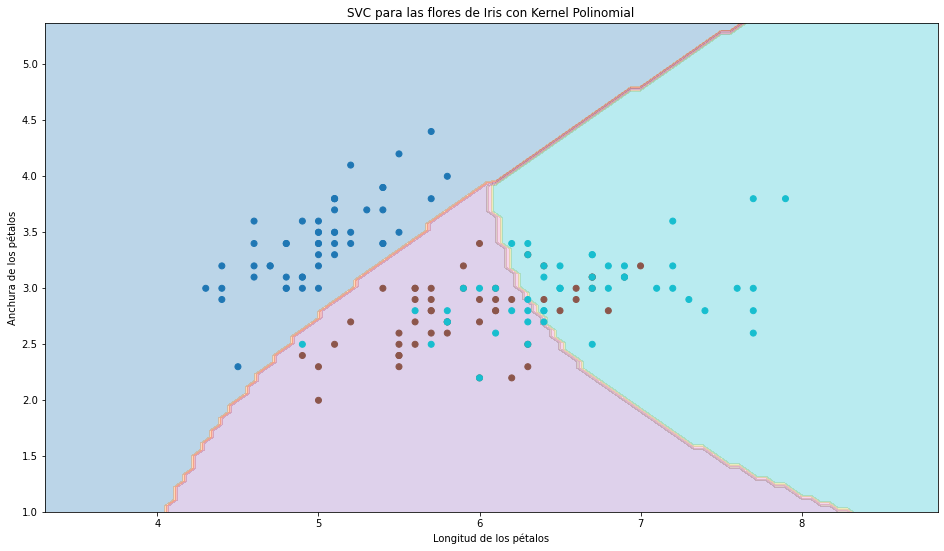

In [ ]:
C = 1.0
svc = svm.SVC(kernel="poly", C=C, decision_function_shape="ovr").fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores de Iris con Kernel Polinomial")

###

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

In [ ]:
X, Y = shuffle(X,Y, random_state = 0)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [ ]:
# Creamos un diccionario - JSON
parameters = [
    {
        "kernel": ['rbf'],
        "gamma": [1e-4, 1e-3,1e-2, 0.1,0.2,0.5], 
        "C": [1,10,100,1000]
    },
    {
        "kernel": ['linear'],
        "C":[1,10,100,1000]

    }
]

In [ ]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"), param_grid = parameters, cv = 5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_params_ # el mejor kernel es el radial

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
clf.cv_results_

In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m, s, p in zip(means, stds, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.515 (+/-0.339) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.515 (+/-0.339) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.596 (+/-0.165) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.779 (+/-0.226) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.225) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.805 (+/-0.225) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.515 (+/-0.339) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.615 (+/-0.159) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.796 (+/-0.195) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.814 (+/-0.215) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.805 (+/-0.201) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.805 (+/-0.225) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.615 (+/-0.159) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.796 (+/-0.195) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.814 (+/-0.199) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.796 (+/-0.210) para {'C': 100, 'gamma'

Una vez seleccionados los mejores parametros hacemos las predicciones.

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred, target_names=["setosa", "versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



de lo anterior se obtine la maxima clasificación para las setosas

# Resumen final de la clasificación de Iris


In [ ]:

def svm_iris(C=1.0, gamma = 0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

     # Cargamos los datos 
    iris = datasets.load_iris()
    
    # Convsersión de los datos
    X = iris.data[:, :2]
    Y = iris.target

    # Redmisión del dataset
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape="ovr").fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.tab10, alpha = 0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [ ]:
from ipywidgets import interact, fixed

In [ ]:
interact(svm_iris, C=[0.01, 0.1, 1,10,100,1000, 1e6, 1e10],
        gamma=[1e-5,1e-4,1e-3,1e-2, 0.1, 0.2, 0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris>

# SVM para Regresión


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X = np.sort(5*np.random.rand(200,1),axis=0) # puntos que empiezan en 1 y acaban en 5
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40)) # de 5 en 5 = 40 numeros modificados

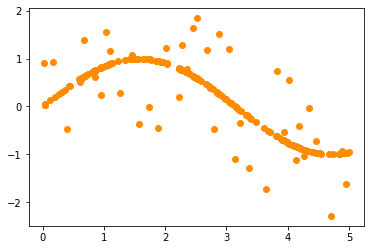

In [ ]:
plt.scatter(X,Y, color = "darkorange", label = "data")

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Vamos hacer 3 regresiones con diferentes kerneles

In [ ]:
C = 1e3
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3) # polinomio de grado 3

In [ ]:
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

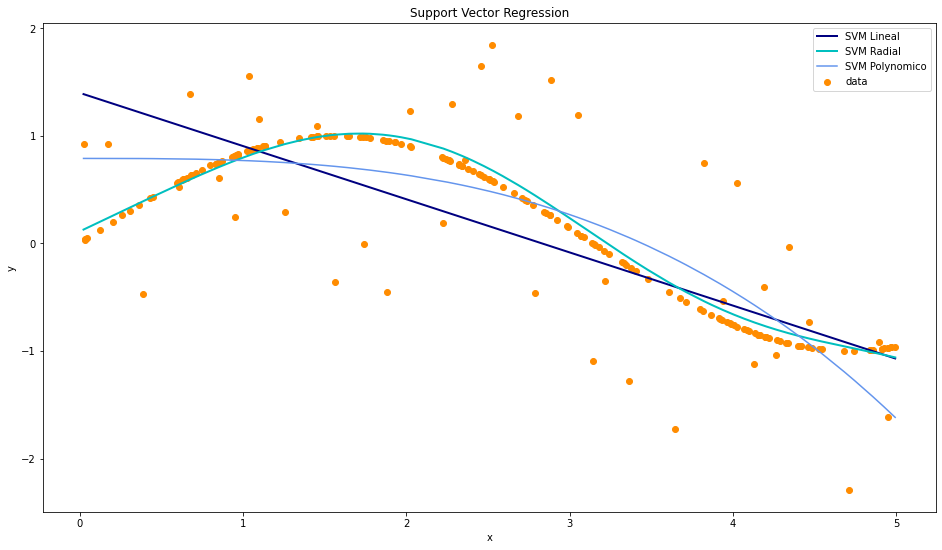

In [ ]:
lw = 2 # grosor d ela linea
plt.figure(figsize = (16,9))
plt.scatter(X,Y, color = "darkorange", label = "data")
plt.plot(X,y_lin, color = "navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color = "c", lw = lw, label = "SVM Radial")
plt.plot(X,y_pol, color = "cornflowerblue", label = "SVM Polynomico")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()